In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df= pd.read_csv('spam_large.csv',encoding='latin1')
df.head(5)


,v1,v2
0,ham,Can you send me the updated file when youâre...
1,spam,Important notice: update your bank details imm...
2,ham,Letâs catch up for coffee this weekend! Sent...
3,spam,Get instant loan approval today with zero docu...
4,ham,Payment confirmed. Thank you for your purchase...


In [3]:
df.tail(5)

,v1,v2
505567,ham,Reminder: your appointment is scheduled for 3 ...
505568,ham,Happy birthday! Hope you have a great day! Sen...
505569,ham,"Hey, are we still meeting tomorrow? Thanks, Br..."
505570,spam,Congratulations! You've won a $1000 Amazon gif...
505571,ham,Your package has been shipped and will arrive ...


In [4]:
df.shape

(505572, 2)

In [5]:
#Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505572 entries, 0 to 505571
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   v1      505572 non-null  object
 1   v2      505570 non-null  object
dtypes: object(2)
memory usage: 7.7+ MB


In [7]:

df['v2'] = df['v2'].fillna("")


In [8]:
df.sample(5)

,v1,v2
218892,spam,Claim your free reward now! Limited offer just...
164109,spam,Congratulations! You've won a $1000 Amazon gif...
457946,ham,Happy birthday! Hope you have a great day! Reg...
421950,spam,Win an iPhone 15 by completing this short surv...
371860,spam,You have pending transactions. Please confirm ...


In [9]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
499912,ham,Happy birthday! Hope you have a great day!
418833,ham,Happy birthday! Hope you have a great day!
352010,ham,Please review the attached project report and ...
406217,spam,Win an iPhone 15 by completing this short surv...
128824,ham,Your package has been shipped and will arrive ...


In [10]:
from sklearn.preprocessing import LabelEncoder 
encoder= LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,Can you send me the updated file when youâre...
1,1,Important notice: update your bank details imm...
2,0,Letâs catch up for coffee this weekend! Sent...
3,1,Get instant loan approval today with zero docu...
4,0,Payment confirmed. Thank you for your purchase...


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(305855)

In [15]:
df= df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.shape

(199717, 2)

In [18]:
df['target'].value_counts()

target
1    117292
0     82425
Name: count, dtype: int64

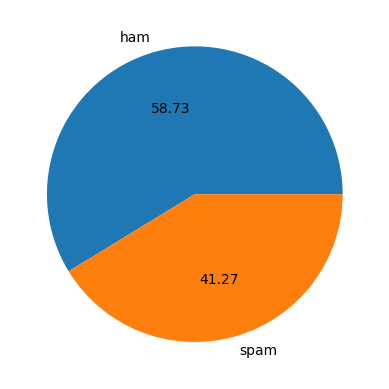

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\avina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
 nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\avina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [23]:
df['num_character'] = df['text'].astype(str).apply(len)

In [24]:
df.head()

,target,text,num_character
0,0,Can you send me the updated file when youâre...,52
1,1,Important notice: update your bank details imm...,84
2,0,Letâs catch up for coffee this weekend! Sent...,61
3,1,Get instant loan approval today with zero docu...,89
4,0,Payment confirmed. Thank you for your purchase...,67


In [25]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(str(x))))

In [26]:
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(str(x))))

In [27]:
df[['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,199717.000000,199717.000000,199717.000000
mean,84.117161,15.932645,2.486689
std,18.927221,3.668512,0.652514
min,0.000000,0.000000,0.000000
25%,70.000000,14.000000,2.000000
50%,83.000000,15.000000,2.000000
75%,98.000000,18.000000,3.000000
max,909.000000,183.000000,34.000000


In [28]:
df[df['target']==0][['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,82425.000000,82425.000000,82425.000000
mean,69.734110,13.800558,2.177264
std,15.159299,3.123424,0.515048
min,0.000000,0.000000,0.000000
25%,64.000000,13.000000,2.000000
50%,69.000000,14.000000,2.000000
75%,76.000000,14.000000,2.000000
max,909.000000,183.000000,34.000000


In [29]:
df[df['target']==1][['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,117292.000000,117292.000000,117292.000000
mean,94.224610,17.430933,2.704132
std,14.176022,3.258888,0.651153
min,13.000000,2.000000,1.000000
25%,85.000000,15.000000,2.000000
50%,95.000000,17.000000,3.000000
75%,105.000000,20.000000,3.000000
max,226.000000,41.000000,9.000000


In [30]:
import seaborn as sns 


<Axes: xlabel='num_character', ylabel='Count'>

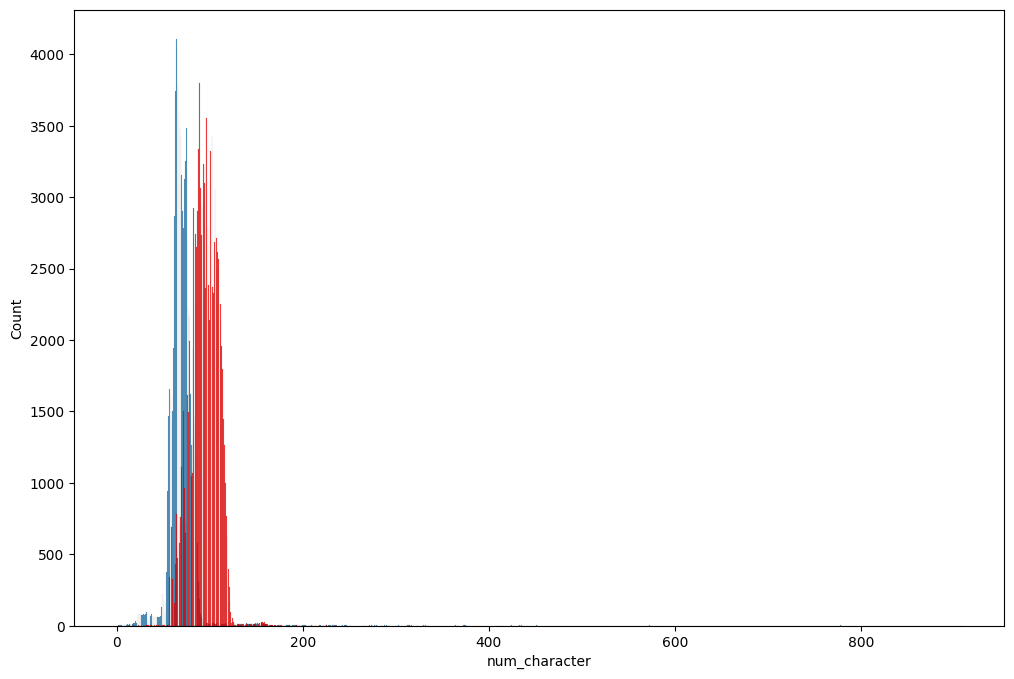

In [31]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_character'])
sns.histplot(df[df['target']==1]['num_character'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

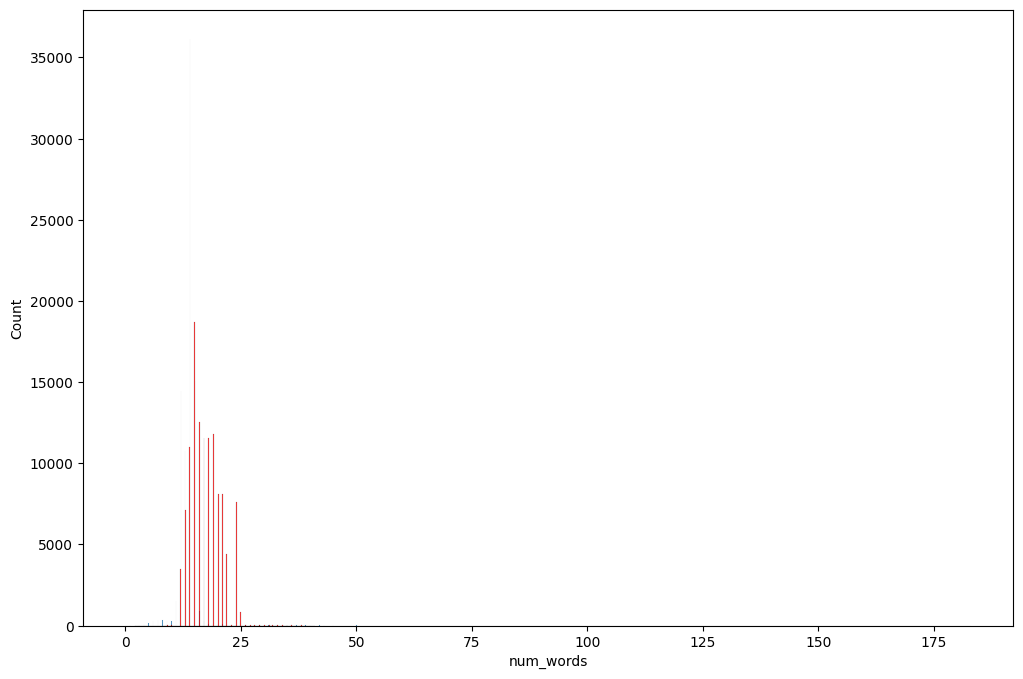

In [32]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentence', ylabel='Count'>

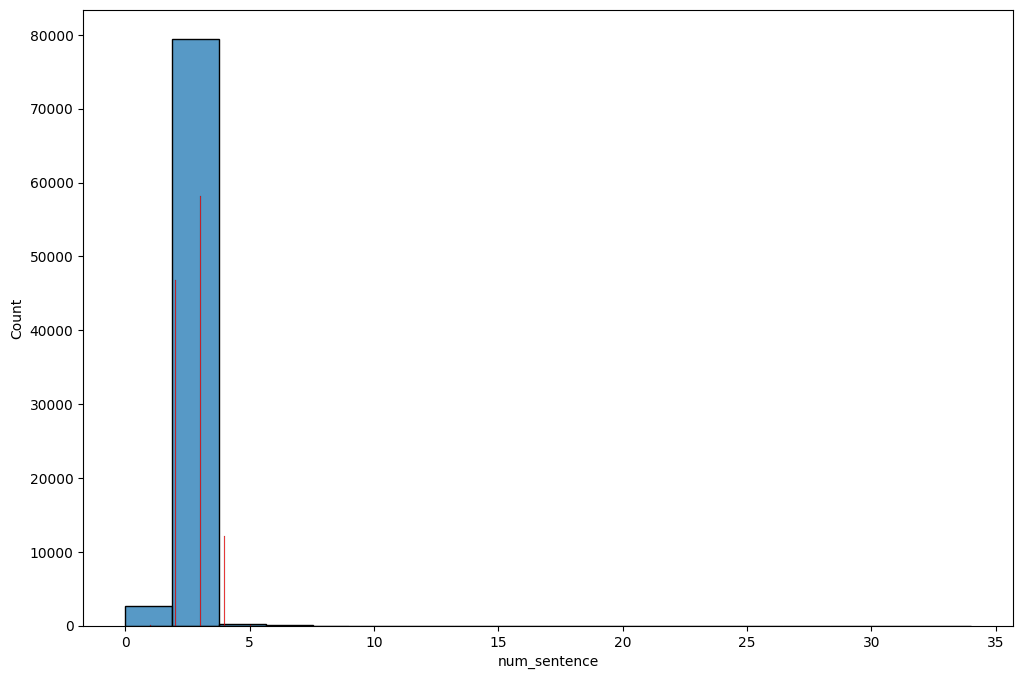

In [33]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_sentence'])
sns.histplot(df[df['target']==1]['num_sentence'],color='red')

In [34]:
#sns.pairplot(df,hue='target')

In [35]:
#data preprocessing 
#lower case 
#tokenization
#removing specisl character
#removing stop words and punctuaion
#stemming 


In [36]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('loving')

'love'

In [38]:
def transform_text(text):
    text= text.lower()
    text= nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [39]:
transform_text('i loved the YT lecture on machine learning, how about you?')

'love yt lectur machin learn'

In [40]:
df['transformed_text']= df['text'].apply(transform_text)

In [41]:
df.head()

,target,text,num_character,num_words,num_sentence,transformed_text
0,0,Can you send me the updated file when youâre...,52,11,1,send updat file done
1,1,Important notice: update your bank details imm...,84,15,2,import notic updat bank detail immedi click http
2,0,Letâs catch up for coffee this weekend! Sent...,61,12,2,catch coffe weekend sent iphon
3,1,Get instant loan approval today with zero docu...,89,15,2,get instant loan approv today zero document cl...
4,0,Payment confirmed. Thank you for your purchase...,67,13,3,payment confirm thank purchas sent laptop


In [42]:
from wordcloud import WordCloud 
wc= WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [43]:
spam_wc= wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

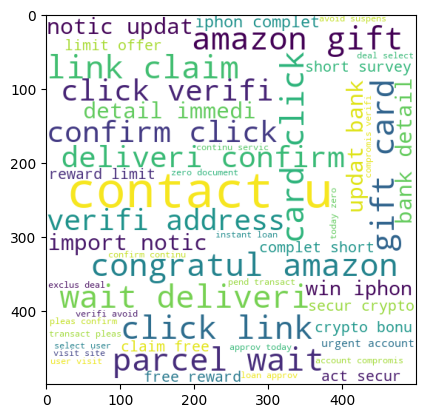

In [44]:
plt.imshow(spam_wc)

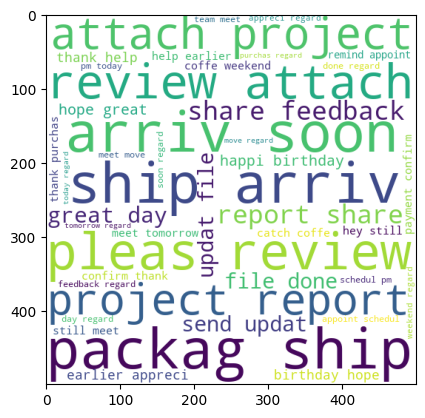

In [45]:
ham_wc= wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [46]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [47]:
len(spam_corpus)

993484

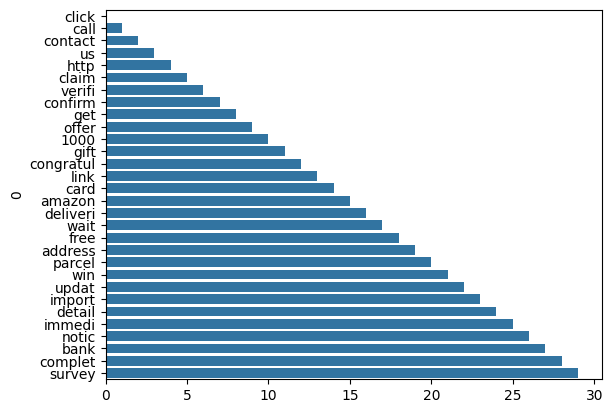

In [48]:
from collections import Counter 
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])

plt.show()

In [49]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [50]:
len(ham_corpus)

615998

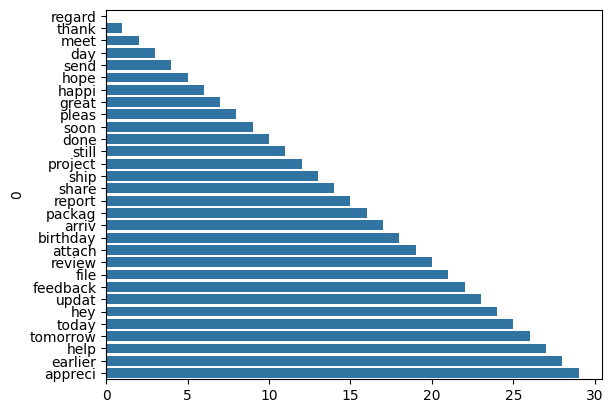

In [51]:
from collections import Counter 
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])

plt.show()

In [52]:
# Data modelling for this Project 

In [53]:
df.head()

,target,text,num_character,num_words,num_sentence,transformed_text
0,0,Can you send me the updated file when youâre...,52,11,1,send updat file done
1,1,Important notice: update your bank details imm...,84,15,2,import notic updat bank detail immedi click http
2,0,Letâs catch up for coffee this weekend! Sent...,61,12,2,catch coffe weekend sent iphon
3,1,Get instant loan approval today with zero docu...,89,15,2,get instant loan approv today zero document cl...
4,0,Payment confirmed. Thank you for your purchase...,67,13,3,payment confirm thank purchas sent laptop


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [55]:
y = df.iloc[:, 0]
text_data= df.iloc[:, 1].astype(str)

In [56]:
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english', lowercase=True)
x = vectorizer.fit_transform(df['text'])


In [57]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#try Gaussian Nb 
gnb = GaussianNB()
gnb.fit(x_train.toarray(), y_train)
y_pred1 = gnb.predict(x_test.toarray())
print((accuracy_score(y_test,y_pred1))*100)
print(confusion_matrix(y_test,y_pred1))
print((precision_score(y_test,y_pred1))*100)

In [59]:
#try Multinomial NB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print((accuracy_score(y_test,y_pred2))*100)
print(confusion_matrix(y_test,y_pred2))
print((precision_score(y_test,y_pred2))*100)


99.81724414179853
[[16462    23]
 [   50 23409]]
99.90184363263913


In [65]:
#try Bernoulli NB
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
y_pred3 = mnb.predict(x_test)
print((accuracy_score(y_test,y_pred3))*100)
print(confusion_matrix(y_test,y_pred3))
print((precision_score(y_test,y_pred3))*100)


99.81724414179853
[[16462    23]
 [   50 23409]]
99.90184363263913


In [61]:
import joblib

# Save trained model and vectorizer
joblib.dump(mnb, 'spam_classifier_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

print("✅ Model and vectorizer saved successfully!")


✅ Model and vectorizer saved successfully!
